In [2]:
import numpy as np
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from scipy.special import comb, perm

In [2]:
def Three_options(x,y):

    xD = x
    xC = y
    xL = 1-x-y

    M = 200
    N = 50
    # 相对效用
    betaD = 1.5  # 1.不合理的地方：betaD是1.5倍，d确是l的8倍
    betaC = 1.1
    # 成本
    d = 4
    c = 1
    l = 0.5
    
    Pd = 0 #内卷群体   的累加净收益
    Pc = 0 #sit-up群体  的累加净收集
    Pl = 0 #躺平群体    的累加净收益
    
    
    for Nd in range(0,N-1):
        for Nc in range(0,N-1-Nd):
            Nl = N-1-Nd-Nc
            pai_d = betaD*d*M/(betaD*(Nd+1)*d +betaC*Nc*c     +Nl*l)-d
            pai_c = betaC*c*M/(betaD*Nd*d     +betaC*(Nc+1)*c +Nl*l)-c
            pai_l =       l*M/(betaD*Nd*d     +betaC*Nc*c     +(Nl+1)*l)-l

            Pd += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_d
            Pc += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_c
            Pl += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_l

    R_ = xD * Pd + xC * Pc + xL * Pl  ##均值
    xD_ = xD * (Pd - R_)
    xC_ = xC * (Pc - R_)
    xL_ = xL * (Pl - R_)
    return xD_

In [3]:
r_min, r_max = 0, 1
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.01)
yaxis = arange(r_min, r_max, 0.01)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

In [9]:
x

array([[0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       ...,
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99]])

In [10]:
length = 100
a = []
for i in range(0,length):
    a.append([j/length for j in range(0, length)])
a = np.array(a)
# print(a)
b = []
for i in range(0,length):
    b.append([i/length for j in range(0, length)])
b = np.array(b)

In [13]:
x

array([[0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       ...,
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99]])

In [5]:
for i in range(length):
    for j in range(length):
        if a[i][j] +b[i][j] >1:
            a[i][j] = 0.3
            b[i][j] = 0.3

In [15]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
10 * np.outer(np.cos(u), np.sin(v))

array([[0.00000000e+00, 3.17279335e-01, 6.34239197e-01, ...,
        6.34239197e-01, 3.17279335e-01, 1.22464680e-15],
       [0.00000000e+00, 3.16640549e-01, 6.32962268e-01, ...,
        6.32962268e-01, 3.16640549e-01, 1.22218119e-15],
       [0.00000000e+00, 3.14726763e-01, 6.29136624e-01, ...,
        6.29136624e-01, 3.14726763e-01, 1.21479429e-15],
       ...,
       [0.00000000e+00, 3.14726763e-01, 6.29136624e-01, ...,
        6.29136624e-01, 3.14726763e-01, 1.21479429e-15],
       [0.00000000e+00, 3.16640549e-01, 6.32962268e-01, ...,
        6.32962268e-01, 3.16640549e-01, 1.22218119e-15],
       [0.00000000e+00, 3.17279335e-01, 6.34239197e-01, ...,
        6.34239197e-01, 3.17279335e-01, 1.22464680e-15]])

C:\Users\38997\AppData\Local\Temp/ipykernel_22196/3759800403.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


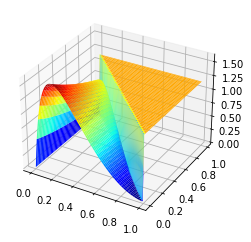

In [6]:
results = Three_options(a, b)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [16]:
import plotly.offline as py
import plotly.graph_objs as go
import random
import math
surf = go.Surface(
    z=results,
    opacity=1,
    colorscale='Hot')

datas = [surf]

#----------------------------------------绘图
layout = go.Layout(
    autosize=False,
    width=1200,
    height=1200,
)

py.iplot(datas)